In [ ]:
# Install required libraries
!pip install opencv-python matplotlib numpy


In [2]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# This line is needed to display images properly in Colab
%matplotlib inline

# Upload an image file
uploaded = files.upload()

# Get the filename of the uploaded image
image_filename = list(uploaded.keys())[0]

# Load the image in grayscale (8-bit single channel)
original_image = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)

# Check if image was loaded successfully
if original_image is None:
    raise ValueError("Image not loaded. Please check the file path.")

# Get image dimensions and type
height, width = original_image.shape
print(f"Image dimensions: {height}x{width}")
print(f"Image data type: {original_image.dtype}")

# Display the original image
plt.figure(figsize=(15, 10))

# (a) Brightness improvement
brightness_increase = 50
brightened_image = cv2.add(original_image, brightness_increase)
brightened_image = np.clip(brightened_image, 0, 255)


Saving 3.jpeg to 3 (1).jpeg
Image dimensions: 1946x3000
Image data type: uint8


<Figure size 1500x1000 with 0 Axes>

In [3]:
# (b) Brightness reduction
brightness_decrease = 50
darkened_image = cv2.subtract(original_image, brightness_decrease)
darkened_image = np.clip(darkened_image, 0, 255)


In [4]:
# (c) Thresholding
threshold_value = 127
_, thresholded_image = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_BINARY)


In [5]:
# (d) Negative of an image
negative_image = cv2.bitwise_not(original_image)


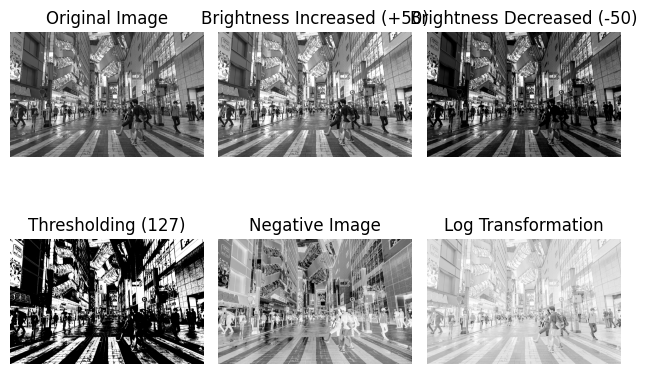

In [6]:
# (e) Log transformation
img_float = np.float32(original_image)
c = 255 / np.log(1 + np.max(img_float))
log_transformed = c * np.log(1 + img_float)
log_transformed = np.uint8(log_transformed)

# Display all transformations in a single figure
plt.subplot(2, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(brightened_image, cmap='gray')
plt.title(f'Brightness Increased (+{brightness_increase})')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(darkened_image, cmap='gray')
plt.title(f'Brightness Decreased (-{brightness_decrease})')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(thresholded_image, cmap='gray')
plt.title(f'Thresholding ({threshold_value})')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(log_transformed, cmap='gray')
plt.title('Log Transformation')
plt.axis('off')

plt.tight_layout()
plt.show()


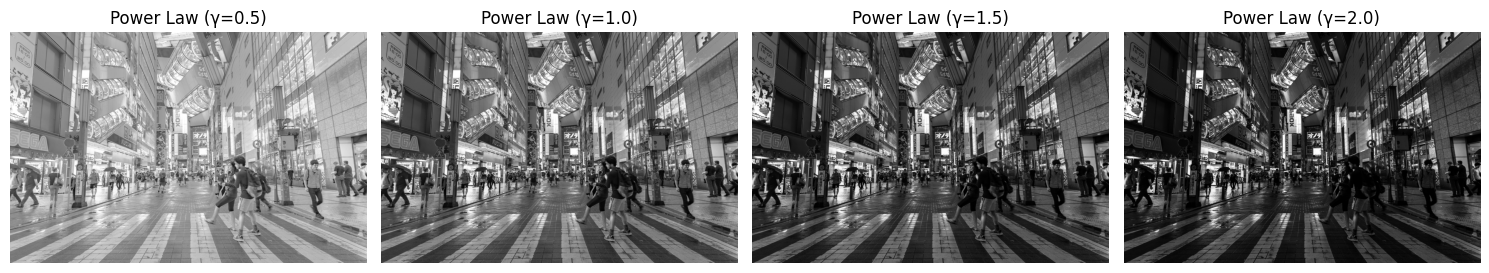

Image processing complete. All images saved.


In [7]:
# (f) Power Law (Gamma) transformation - Displayed separately
plt.figure(figsize=(15, 5))

# Try different gamma values
gammas = [0.5, 1.0, 1.5, 2.0]
for i, gamma in enumerate(gammas):
    gamma_corrected = np.array(255 * (original_image / 255) ** gamma, dtype='uint8')
    plt.subplot(1, len(gammas), i+1)
    plt.imshow(gamma_corrected, cmap='gray')
    plt.title(f'Power Law (γ={gamma})')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Save all processed images
cv2.imwrite('brightened_image.jpg', brightened_image)
cv2.imwrite('darkened_image.jpg', darkened_image)
cv2.imwrite('thresholded_image.jpg', thresholded_image)
cv2.imwrite('negative_image.jpg', negative_image)
cv2.imwrite('log_transformed.jpg', log_transformed)

# Save one gamma transformation as example
gamma_corrected = np.array(255 * (original_image / 255) ** 0.5, dtype='uint8')
cv2.imwrite('gamma_corrected.jpg', gamma_corrected)

print("Image processing complete. All images saved.")